## Imports

In [1]:
import numpy as np
from IPython.display import Image
import time
import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')

## Set a fixed random seed value

In [2]:
seed = np.random.seed(1)

## Question-3

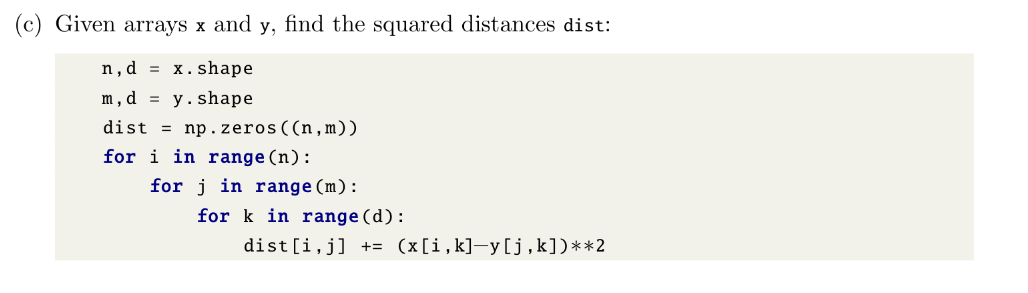

In [3]:
Image(filename="question-3.png", width=800, height=400)

## Prepare sample data and parameters

In [4]:
def prepare_data(n=40, m=20, d=10):
    x = np.random.random((n, d))
    y = np.random.random((m, d))
    
    return x, y

In [5]:
x, y = prepare_data()

## Non-vectorized version

In [6]:
def non_vect(x, y):
    n, d = x.shape
    m, d = y.shape

    dist = np.zeros((n, m))

    for i in range(n):
        for j in range(m):
            for k in range(d):
                dist[i, j] += (x[i, k]-y[j, k])**2
            
    return dist

In [7]:
dist = non_vect(x, y)

## Vectorized version

In [8]:
def vect(x, y):
    n, d = x.shape
    m, d = y.shape

    dist = np.zeros((n, m))


    # (a-b)^2 = a.a + b.b -2.a.b
    outer_sum = np.add.outer(np.sum(x**2, axis=1), np.sum(y**2, axis=1))
    dot = np.dot(x, y.T)
    dist_vect = outer_sum-2*dot
    
    return dist_vect

In [9]:
dist_vect = vect(x, y)

## Sanity check

In [10]:
np.round(dist) == np.round(dist_vect)

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True],
       [ T

In [11]:
dist[0:1]

array([[1.41955323, 1.98101687, 0.87642126, 1.78343095, 3.13706926,
        2.76364802, 1.32885283, 1.94804486, 1.07880429, 2.17135445,
        1.38672904, 0.98271682, 1.80899097, 2.96186637, 1.03064516,
        1.20478187, 2.30461646, 1.51181796, 2.00459542, 0.91144179]])

In [12]:
dist_vect[0:1]

array([[1.41955323, 1.98101687, 0.87642126, 1.78343095, 3.13706926,
        2.76364802, 1.32885283, 1.94804486, 1.07880429, 2.17135445,
        1.38672904, 0.98271682, 1.80899097, 2.96186637, 1.03064516,
        1.20478187, 2.30461646, 1.51181796, 2.00459542, 0.91144179]])

## Benchmarking

In [13]:
UPTO_POWER_OF_TWO = 10

In [14]:
def benchmark(upto, function):
    
    benchmark_dict = {}
    
    for i in range(1, upto):
        
        data_size = 2**i
        n = 2**i
        m = n//2
        d = 10
        x, y = prepare_data(n, m, d)
        print("On iteration: {}, n: {}, m: {}, d: {}".format(i, n, m, d))
        
        start = time.time()
        function(x, y)
        end = time.time()
        
        benchmark_dict[i] = end-start
    
    return benchmark_dict

In [15]:
non_vect_benchmark_dict = benchmark(upto=UPTO_POWER_OF_TWO, function=non_vect)

On iteration: 1, n: 2, m: 1, d: 10
On iteration: 2, n: 4, m: 2, d: 10
On iteration: 3, n: 8, m: 4, d: 10
On iteration: 4, n: 16, m: 8, d: 10
On iteration: 5, n: 32, m: 16, d: 10
On iteration: 6, n: 64, m: 32, d: 10
On iteration: 7, n: 128, m: 64, d: 10
On iteration: 8, n: 256, m: 128, d: 10
On iteration: 9, n: 512, m: 256, d: 10


In [16]:
vect_benchmark_dict = benchmark(upto=UPTO_POWER_OF_TWO, function=vect)

On iteration: 1, n: 2, m: 1, d: 10
On iteration: 2, n: 4, m: 2, d: 10
On iteration: 3, n: 8, m: 4, d: 10
On iteration: 4, n: 16, m: 8, d: 10
On iteration: 5, n: 32, m: 16, d: 10
On iteration: 6, n: 64, m: 32, d: 10
On iteration: 7, n: 128, m: 64, d: 10
On iteration: 8, n: 256, m: 128, d: 10
On iteration: 9, n: 512, m: 256, d: 10


## Plot

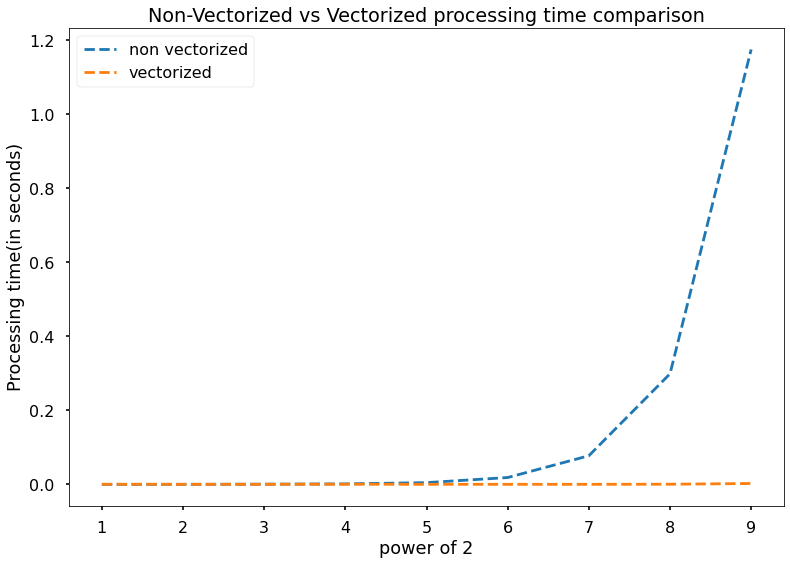

In [17]:
x1 = list(non_vect_benchmark_dict.keys())
y1 = list(non_vect_benchmark_dict.values())

x2 = list(vect_benchmark_dict.keys())
y2 = list(vect_benchmark_dict.values())

plt.title('Non-Vectorized vs Vectorized processing time comparison')
plt.xlabel('power of 2')
plt.ylabel('Processing time(in seconds)')
plt.plot(x1, y1, '--', x2, y2, '--');
plt.legend(('non vectorized', 'vectorized'), loc='upper left');

___